In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/saeedazad/Desktop/Projects/airbnb-data-analysis/Airbnb_Open_Data.csv", low_memory=False)

In [3]:
df1= df.copy()

In [4]:
df1.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df1.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
columns = df1.columns
columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df1.columns = df1.columns.str.replace(' ', '_')

In [9]:
df1['price'] = pd.to_numeric(df1['price'].str.replace('[$,]', '', regex=True), errors='coerce')

In [10]:
df1.shape

(102599, 26)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [12]:
# check duplicates

df1.loc[df1.duplicated()].head() 

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN


In [14]:
df1['neighbourhood_group'].value_counts()


neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [18]:
# Correct misspelled neighbourhood group names
df1['neighbourhood_group'] = df1['neighbourhood_group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})


In [16]:
df1['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64

In [17]:
# drop licence column as it is empty except two values
df1.drop(columns='license', inplace=True)

In [19]:
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64

In [20]:
 #Drop duplicate rows from the DataFrame, keeping the first occurrence.
df1.drop_duplicates(keep='first', inplace=True)


<table style="color:#BC4A3C; font-size:20px; font-family:'SourceCodePro';">
<br>
  <td><b>Identifying duplicates that combine of property host, coordinate and price then grouping by host_name </b></td>
</table>


In [25]:

listing_duplicated = df1.loc[df1.duplicated(subset=['host_name', 'lat', 'long', 'price'], keep=False)]
listing_duplicated_sorted = listing_duplicated.sort_values(by=['host_name','lat', 'long', 'price'])
#listing_duplicated_sorted.head(20)
listing_grouped = listing_duplicated_sorted.groupby(['host_name', 'lat','long','price'])


# for n, (host_name, value) in enumerate(listing_grouped):
#         if n>=5:
#            break
#         print(f"Host: {host_name}")
#         print(value)
#         print("\n")      
rows = []
for _, group in listing_grouped:
      rows.append(group)
listing_duplicated_data = pd.concat(rows, ignore_index=True)       
listing_duplicated_data.head(10)      
              

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,6698863,MANHATTAN LIVING!,47503557541,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.78938,-73.94679,United States,...,1179.0,$236,7.0,3.0,12/8/2017,0.06,1.0,1.0,403.0,NaN
1,40849229,MANHATTAN LIVING!,29667285224,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.78938,-73.94679,United States,...,1179.0,$236,7.0,3.0,12/8/2017,0.06,1.0,1.0,56.0,NaN
2,20426279,Prewar Gem in Middle of Everything!,54282592368,verified,(Email hidden by Airbnb),Manhattan,Midtown,40.76399,-73.98077,United States,...,298.0,$60,3.0,3.0,11/17/2018,0.31,2.0,2.0,0.0,This is a non-smoking residence. There is lig...
3,55184175,Prewar Gem in Middle of Everything!,15009968728,unconfirmed,(Email hidden by Airbnb),Manhattan,Midtown,40.76399,-73.98077,United States,...,298.0,$60,3.0,3.0,11/17/2018,0.31,2.0,2.0,0.0,This is a non-smoking residence. There is lig...
4,9420045,Upper West Side One Bedroom on Central Park,71186355784,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.79610,-73.96300,United States,...,62.0,$12,1.0,60.0,7/6/2019,2.91,1.0,1.0,182.0,NaN
5,47982736,Upper West Side One Bedroom on Central Park,44094754427,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.79610,-73.96300,United States,...,62.0,$12,1.0,60.0,7/6/2019,2.91,1.0,1.0,182.0,NaN
6,11796040,Newly Renovate 2 Bedroom Apartment in Central ...,93276365126,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN
7,43367717,Newly Renovate 2 Bedroom Apartment in Central ...,97706575002,unconfirmed,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN
8,50358730,Newly Renovate 2 Bedroom Apartment in Central ...,8771779200,unconfirmed,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN
9,56028090,Newly Renovate 2 Bedroom Apartment in Central ...,11521662908,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN


In [27]:
listing_duplicated = df1.loc[df1.duplicated(subset=['host_name', 'lat', 'long', 'price'], keep=False)]
listing_duplicated_sorted = listing_duplicated.sort_values(by=['host_name','lat', 'long', 'price'])

# Create a dictionary to store the groups
group_dict = {}
for name, group in listing_duplicated_sorted.groupby(['host_name', 'lat', 'long', 'price']):
    group_dict[name] = group

# Create a list to store DataFrames with style information
rows = []
for i, (name, group) in enumerate(group_dict.items()):
    # Alternate between green and light green
    color = 'background-color: #90EE90' if i % 2 == 0 else 'background-color: #CCFFCC'  
    # Add a new column with the style information
    group = group.copy()
    group['style'] = color
    rows.append(group)

# Concatenate all groups
listing_duplicated_data = pd.concat(rows, ignore_index=True)

# Apply styling when displaying the DataFrame
def highlight_rows(row):
    return [row['style']] * len(row)

# Display the styled DataFrame
listing_duplicated_data.head(10).style.apply(highlight_rows, axis=1)

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,style
0,6698863,MANHATTAN LIVING!,47503557541,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.789380,-73.946790,United States,US,True,moderate,Entire home/apt,2020.000000,1179.000000,$236,7.000000,3.000000,12/8/2017,0.060000,1.000000,1.000000,403.000000,nan,background-color: #90EE90
1,40849229,MANHATTAN LIVING!,29667285224,verified,(Ari) HENRY LEE,Manhattan,East Harlem,40.789380,-73.946790,United States,US,True,moderate,Entire home/apt,2020.000000,1179.000000,$236,7.000000,3.000000,12/8/2017,0.060000,1.000000,1.000000,56.000000,nan,background-color: #90EE90
2,20426279,Prewar Gem in Middle of Everything!,54282592368,verified,(Email hidden by Airbnb),Manhattan,Midtown,40.763990,-73.980770,United States,US,True,flexible,Private room,2014.000000,298.000000,$60,3.000000,3.000000,11/17/2018,0.310000,2.000000,2.000000,0.000000,"This is a non-smoking residence. There is light housekeeping (washing of linens (biweekly), towels, removal of kitchen trash) but guests are expected to clean up after themselves and keep the area tidy, including removing hair from the bathtub and sink and washing dishes right away. Remove shoes in the apartment. Slippers are OK. Turn off lights when exiting a room or hallway. Guests are not permitted without prior authorization. Overnight guests are not allowed. Be courteous to others in the household. Additional rules will be in the house manual, available upon arrival.",background-color: #CCFFCC
3,55184175,Prewar Gem in Middle of Everything!,15009968728,unconfirmed,(Email hidden by Airbnb),Manhattan,Midtown,40.763990,-73.980770,United States,US,False,moderate,Private room,2014.000000,298.000000,$60,3.000000,3.000000,11/17/2018,0.310000,2.000000,2.000000,0.000000,"This is a non-smoking residence. There is light housekeeping (washing of linens (biweekly), towels, removal of kitchen trash) but guests are expected to clean up after themselves and keep the area tidy, including removing hair from the bathtub and sink and washing dishes right away. Remove shoes in the apartment. Slippers are OK. Turn off lights when exiting a room or hallway. Guests are not permitted without prior authorization. Overnight guests are not allowed. Be courteous to others in the household. Additional rules will be in the house manual, available upon arrival.",background-color: #CCFFCC
4,9420045,Upper West Side One Bedroom on Central Park,71186355784,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.796100,-73.963000,United States,US,False,strict,Private room,2018.000000,62.000000,$12,1.000000,60.000000,7/6/2019,2.910000,1.000000,1.000000,182.000000,nan,background-color: #90EE90
5,47982736,Upper West Side One Bedroom on Central Park,44094754427,unconfirmed,(Email hidden by Airbnb),Manhattan,Upper West Side,40.796100,-73.963000,United States,US,True,moderate,Private room,2018.000000,62.000000,$12,1.000000,60.000000,7/6/2019,2.910000,1.000000,1.000000,182.000000,nan,background-color: #90EE90
6,11796040,Newly Renovate 2 Bedroom Apartment in Central Area,93276365126,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.634610,-74.024510,United States,US,True,moderate,Entire home/apt,2018.000000,465.000000,$93,1.000000,188.000000,6/24/2019,5.810000,2.000000,1.000000,295.000000,nan,background-color: #CCFFCC
7,43367717,Newly Renovate 2 Bedroom Apartment in Central Area,97706575002,unconfirmed,(Mary) Haiy,Brooklyn,Bay Ridge,40.634610,-74.024510,United States,US,True,flexible,Entire home/apt,2018.000000,465.000000,$93,1.000000,188.000000,6/24/2019,5.810000,2.000000,1.000000,295.000000,nan,background-color: #CCFFCC
8,50358730,Newly Renovate 2 Bedroom Apartment in Central Area,8771779200,unconfirmed,(Mary) 

In [29]:
duplicated = df1.loc[(df1['id']==11796040) |(df1['id']==50358730)]
duplicated

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
19545,11796040,Newly Renovate 2 Bedroom Apartment in Central ...,93276365126,verified,(Mary) Haiy,Brooklyn,Bay Ridge,40.63461,-74.02451,United States,...,465.0,$93,1.0,188.0,6/24/2019,5.81,2.0,1.0,295.0,NaN


In [28]:

df1.drop_duplicates(subset=['host_name', 'lat', 'long', 'price'], inplace=True)

In [111]:
#df1.dropna(subset='price' , inplace=True)

In [37]:
df1['neighbourhood_group'].isna().sum()

np.int64(29)

 <table style="color:black; background-color:#AFE1AF; font-size:20px; font-family:'SourceCodePro';">
  <tr>
    <th>Task</th>
    <th >Description</th>
  </tr>
  <tr>
    <td >Impute</td>
    <td>Utilize geopy to impute the neighborhood and neighborhood group based on provided latitude and longitude coordinates.</td>
  </tr>
</table>


In [39]:
#!pip install geopy
#try it out 
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

# Check sample location
location = geolocator.geocode("New Farm")
location

Location(New Farm, Greater Brisbane, Queensland, 4005, Australia, (-27.466589, 153.04693631358884, 0.0))

In [40]:
# 
def loc_from_cord(lat, lng):
    try:
        location = geolocator.reverse(f"{lat}, {lng}", timeout=30)
        return location.raw['address'].get('road', '')
    except Exception as e:
        print(f"the error is {e}")
        return 'unknown'

In [ ]:
# idx = df1[df1['neighbourhood'].isna()].index
# df1.loc[idx, 'neighbourhood'] = df1.loc[idx].apply(lambda x:loc_from_cord(x.lat, x.long), axis=1)
df1.loc[df1['neighbourhood'].isna(), 'neighbourhood'] = df1.loc[df1['neighbourhood'].isna()].apply(lambda x:loc_from_cord(x.lat, x.long),axis=1)

In [46]:
df1['neighbourhood_group'].isna().sum()

np.int64(29)

In [49]:
def borough_from_coord(lat, long):
    location = geolocator.reverse(f"{lat}, {long}", timeout=20)
    return location.raw['address'].get('borough', ',')



In [50]:
idx = df1[df1['neighbourhood_group'].isnull()].index

In [51]:
## impute  the neighbourdhood_group with finding borough based on lat, long
df1.loc[idx, 'neighbourhood_group'] = df.loc[idx].apply(lambda x:borough_from_coord(x.lat, x.long), axis=1)

In [88]:
# 
lat_null_index = df[df.long.isnull()].index
lat_null_index

Index([779, 785, 799, 814, 843, 885, 926, 986], dtype='int64')

In [100]:
"""
    This function is used for imputing latitude and longitude.Get the geographical coordinates (latitude and longitude) for a given location.
"""
def get_coordinates(loc):
    location = geolocator.geocode(loc, timeout=30)
    if pd.isnull(lat) or pd.isnull(long):
        return None, None
    if location:
        return location.latitude, location.longitude
    return None, None


In [99]:
get_coordinates(f"New Farm,Greater Brisbane")

(-27.466589, 153.04693631358884)

In [ ]:
for idx in lat_null_index:
    location_str = f"{df1.loc[idx,'neighbourhood']}, {df1.loc[idx,'neighbourhood_group']}"
    lat, long = get_coordinates(location_str)
    df1.loc[idx,'lat'] =lat
    df1.loc[idx,'long']=long

#df1.loc[idx, 'long'] = df1.loc[idx].apply(lambda x:long_from_loc(f"{x['neighbourhood']}, {x['neighbourhood_group']}"),axis=1)

In [97]:
df1.isna().sum().sort_values(ascending=False)

house_rules                       36645
last_review                       10828
reviews_per_month                 10814
availability_365                    438
minimum_nights                      363
country                             323
host_name                           313
price                               245
service_fee                         241
review_rate_number                  239
host_identity_verified              217
NAME                                208
Construction_year                   190
number_of_reviews                   152
calculated_host_listings_count      144
instant_bookable                     86
country_code                         86
cancellation_policy                  57
lat                                   0
long                                  0
neighbourhood_group                   0
host_id                               0
id                                    0
neighbourhood                         0
room_type                             0


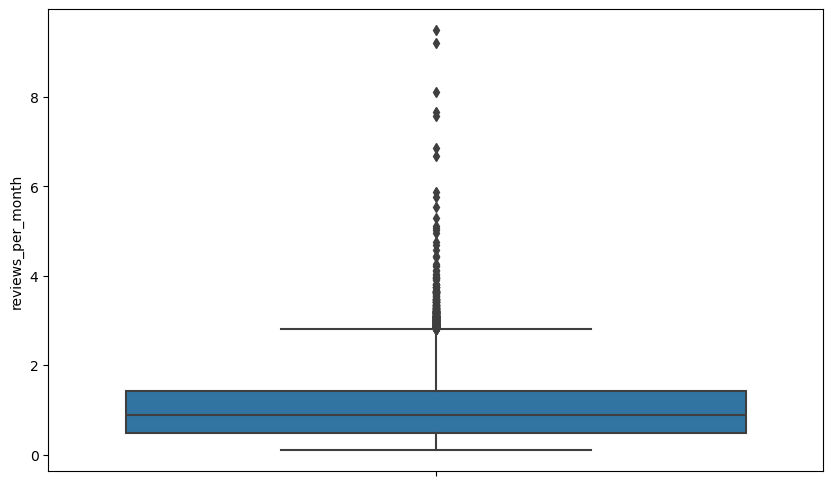

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the boxplot with the transformed data
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df1, y=np.sqrt(df1['reviews_per_month']), ax=ax1)

# Show the plot
plt.show()


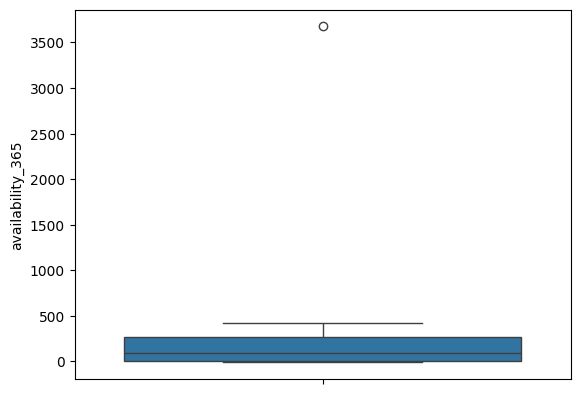

In [95]:
sns.boxplot(data=df1, y='availability_365')
plt.show()  

In [106]:
df1['last_review'] = pd.to_datetime(df1['last_review'])

In [146]:
df1['last_review'].head()

0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [111]:
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1['last_review'].min(), df1['last_review'].median(), df1['last_review'].max()

(Timestamp('2012-07-11 00:00:00'),
 Timestamp('2019-06-23 00:00:00'),
 Timestamp('2058-06-16 00:00:00'))

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69305 entries, 0 to 102050
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69305 non-null  int64         
 1   NAME                            69097 non-null  object        
 2   host_id                         69305 non-null  int64         
 3   host_identity_verified          69088 non-null  object        
 4   host_name                       68992 non-null  object        
 5   neighbourhood_group             69305 non-null  object        
 6   neighbourhood                   69305 non-null  object        
 7   lat                             69305 non-null  float64       
 8   long                            69305 non-null  float64       
 9   country                         68982 non-null  object        
 10  country_code                    69219 non-null  object        
 11  instan

/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


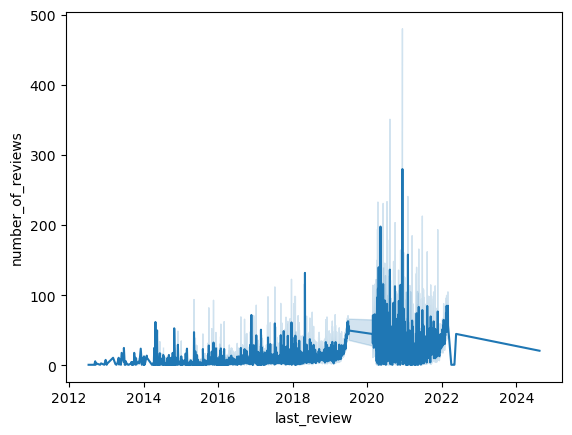

In [143]:
sns.lineplot(data=df1, x='last_review', y='number_of_reviews')
plt.show()

/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


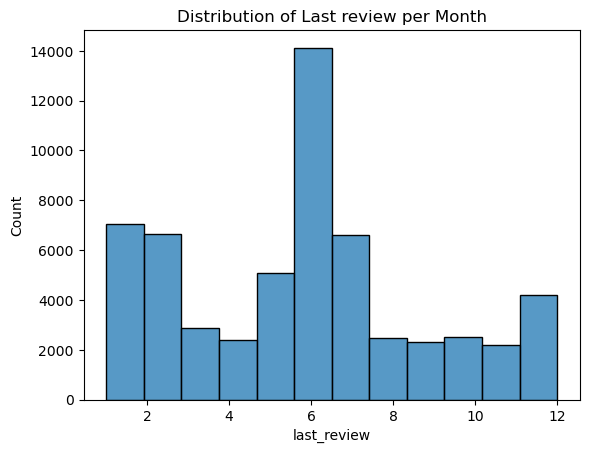

In [147]:
sns.histplot(df1['last_review'].dt.month, bins=12, kde=False)
plt.title("Distribution of Last review per Month")
plt.show()

In [148]:
#Replace null value with median last_review 
df1.loc[df1['last_review'].isnull(), 'last_review']= df1['last_review'].median()

In [111]:
# do the same thing for reviews_per_month

df1.loc[df1['reviews_per_month'].isnull(), 'reviews_per_month']=df1['reviews_per_month'].median()

In [198]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

def loc_from_coord(lat, long):
    try:
        location = geolocator.reverse(f"{lat},{long}", timeout=10)
        print(location.raw)  # Debug information
        if location and 'address' in location.raw:
            address = location.raw['address']
            # Attempt to retrieve a more granular location if 'suburb' is not available
            return address.get('borough', address.get('city', address.get('town', address.get('village', 'Unknown'))))
        else:
            return 'Unknown'
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error: {e}")
        return 'Error'


In [ ]:
print(loc_from_coord(40.72828, -73.98801))

In [62]:
print(loc_from_coord(40.68346, -73.96374))

Brooklyn


In [150]:
''' delete column country code'''
df1.drop('country_code', axis=1, inplace=True)

In [153]:
df1['host_identity_verified'].isnull().sum()

np.int64(217)

In [154]:
# assign unconfirmed value to nan values in host_identity_verified
df1.loc[df1['host_identity_verified'].isnull(), 'host_identity_verified']='unconfirmed'


In [155]:
df1.loc[df1['availability_365'].isnull(), 'availability_365']=df1['availability_365'].median()

In [156]:
df1.loc[df1['price'].isnull(), 'price']= df1['price'].median()

In [165]:
# To convert $ or anyhing that is not digit or nan to '' in service fee
df1.loc[~df1['service_fee'].isna(),'service_fee']= df1.loc[~df1['service_fee'].isna()].apply(lambda x:re.sub(r'\D','',x['service_fee']),axis=1)

In [170]:
round(df1['service_fee'].median())

125

In [171]:
df1['service_fee'] = pd.to_numeric(df1['service_fee'])
df1.loc[df1['service_fee'].isna(),'service_fee'] = round(df1['service_fee'].median())

In [184]:
df1.loc[df1['minimum_nights']>1000]

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,days_since_last_review
350,1194641,LARGE 1BR (CONV 2BR) CROWN HEIGHTS,66643346348,verified,Russell,Brooklyn,Crown Heights,40.67473,-73.94494,United States,...,228.0,3455.0,0.0,2019-06-23,NaN,1.0,1.0,127.0,NaN,NaN
5768,4187002,Prime W. Village location 1 bdrm,62526606377,verified,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,United States,...,76.0,1250.0,2.0,2014-11-09,0.03,2.0,1.0,26.0,NaN,3567.0
42398,24417751,Bedroom in Prime Bushwick,29378706293,verified,Elena,Brooklyn,Bushwick,40.70235,-73.92892,United States,...,91.0,5645.0,1.0,2019-06-05,0.88,4.0,1.0,0.0,No drugs please.,1898.0
42407,24422722,Modern & Cozy 2 BR Private Apartment in Brooklyn,83669529485,unconfirmed,Gk,Brooklyn,Bay Ridge,40.63189,-74.02322,United States,...,169.0,2645.0,14.0,2019-06-14,3.59,3.0,1.0,271.0,No smoking (indoors or outside on the property...,1889.0


<table style=" color:black; background-color:#48c9b0 ; font=family:'monospace';">
<td> Handling outliers in minimum_nights column using the IQR method</td>
</table>

In [175]:
df1.minimum_nights.min() , df1.minimum_nights.max()

(-1223.0, 5645.0)

/Users/saeedazad/miniconda3/envs/airbnb_venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


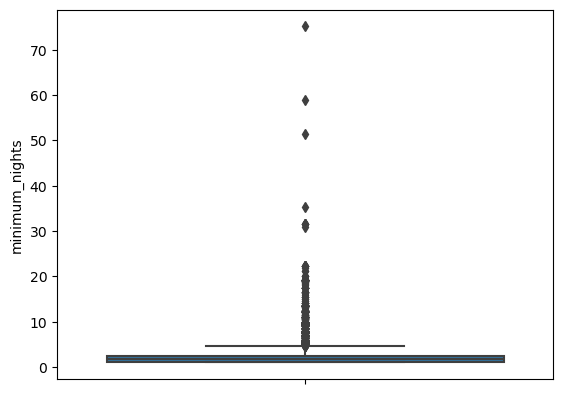

In [185]:
sns.boxplot(data=df1, y=np.sqrt(df1['minimum_nights']))

plt.show()

In [186]:
Q1 = df1['minimum_nights'].quantile(0.25)
Q3 = df1['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_bound

np.float64(13.5)

In [187]:
df1['minimum_nights'].clip(lower=0, upper=round(upper_bound), inplace=True)

In [190]:
df1['minimum_nights'].median()

3.0

In [206]:
df1['minimum_nights'] = df1['minimum_nights'].fillna(df1['minimum_nights'].median())

In [193]:
df1['review_rate_number']=df1['review_rate_number'].fillna(df1['review_rate_number'].median())

In [215]:
df1['Construction_year'].fillna(df1['Construction_year'].median(), inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/3103275824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Construction_year'].fillna(df1['Construction_year'].median(), inplace=True)


In [217]:
df1['number_of_reviews'].fillna(df1['number_of_reviews'].median(), inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/2846130067.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['number_of_reviews'].fillna(df1['number_of_reviews'].median(), inplace=True)


In [218]:
df1['calculated_host_listings_count'].fillna(df1['calculated_host_listings_count'].median(), inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/117120287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['calculated_host_listings_count'].fillna(df1['calculated_host_listings_count'].median(), inplace=True)


In [219]:
df1.cancellation_policy.fillna('moderate', inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/1972601848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.cancellation_policy.fillna('moderate', inplace=True)


In [221]:
df1.instant_bookable.fillna(True, inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/714832131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.instant_bookable.fillna(True, inplace=True)
/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/714832131.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.instant_bo

In [222]:
df1.isna().sum().sort_values(ascending=False)

id                                0
NAME                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
Construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

<h4> Additional column</h4>
<ul> <li>Add a new column to provide the property's distance from LGA airport. </li><ul>

In [ ]:
## find each house distance from LaGuardia Airport (LGA)that handles most of domestic flies in New york city.
from geopy.distance import geodesic
airport_point = (40.776863, -73.874069)
def calculate_distance(row):
    point = (row['lat'], row['long'])
    return geodesic(airport_point, point).kilometers

In [225]:
df1.to_csv('clean_airbnb_data.csv',mode='w', index=False)

In [229]:
!brew install postgresql


==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/services, homebrew/core and homebrew/cask).
==> New Formulae
codeberg-cli               kube-bench                 netatalk
codesnap                   libsvgtiny                 termbg
==> New Casks
font-atkinson-hyperlegible-mono          font-nanum-square-round
font-atkinson-hyperlegible-next          macai
font-nanum-square                        satdump
font-nanum-square-neo                    serial-studio

You have 6 outdated formulae installed.

==> Downloading https://ghcr.io/v2/homebrew/core/postgresql/14/manifests/14.15
######################################################################### 100.0%
==> Fetching postgresql@14
==> Downloading https://ghcr.io/v2/homebrew/core/postgresql/14/blobs/sha256:821c
##############################

In [230]:
!pip install  sqlalchemy psycopg2

  Using cached SQLAlchemy-2.0.37-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.6 kB)
  Using cached psycopg2-2.9.10.tar.gz (385 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 180.1 kB/s eta 0:00:00a 0:00:02
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp313-cp313-macosx_14_0_x86_64.whl size=144677 sha256=173714b23ecd9b65aa9c28842b6e82e7dce029a5ab758609fdde074d0f68a906
  Stored in directory: /Users/saeedazad/Library/Caches/pip/wheels/d1/02/6b/6fab072a7ac365814e6d6217fef5525fa5ac3c64204a418040
Successfully built psycopg2


#####  Integrating Data into Django

As I want to integrate the data into Django, follow these steps:

1. **Create Django Models**: Define the models in Django to match the structure of your DataFrame.
2. **Insert Data into PostgreSQL**: Use the `df.to_sql()` function to efficiently transfer data

                 

In [36]:

from sqlalchemy import create_engine

# Replace the placeholders with your database credentials
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
USER = 'saeedazad'
PASSWORD = '2431'
HOST = 'localhost'
PORT = 5432
DATABASE = 'HomeStay'

# Create the engine
engine = create_engine(f'{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')


ModuleNotFoundError: No module named 'sqlalchemy'

In [ ]:
clean_df = pd.read_csv("/Users/saeedazad/clean_airbnb_data.csv")
df = clean_df.copy()
df.head()

In [233]:
# Assuming df is your DataFrame
df1.to_sql('airbnb_data', engine, index=False, if_exists='replace')  # Use 'append' if you want to add to an existing table


305

In [12]:
values = df1['reviews_per_month'].values
values

array([0.21, 0.38,  nan, ...,  nan, 0.1 ,  nan], shape=(102599,))

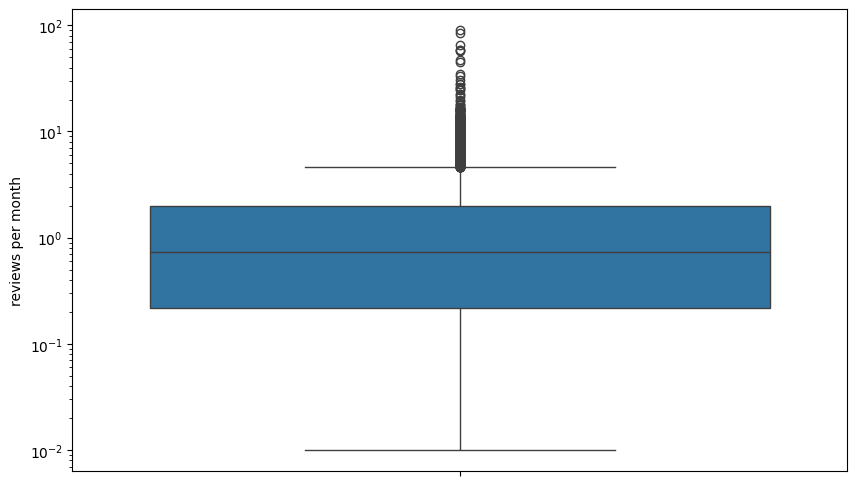

In [17]:
# Create a boxplot
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample right-skewed data
values = df1['reviews_per_month'].values

# Create the figure and boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
sns.boxplot(y='reviews per month', data=df)
plt.yscale('log')
plt.show()




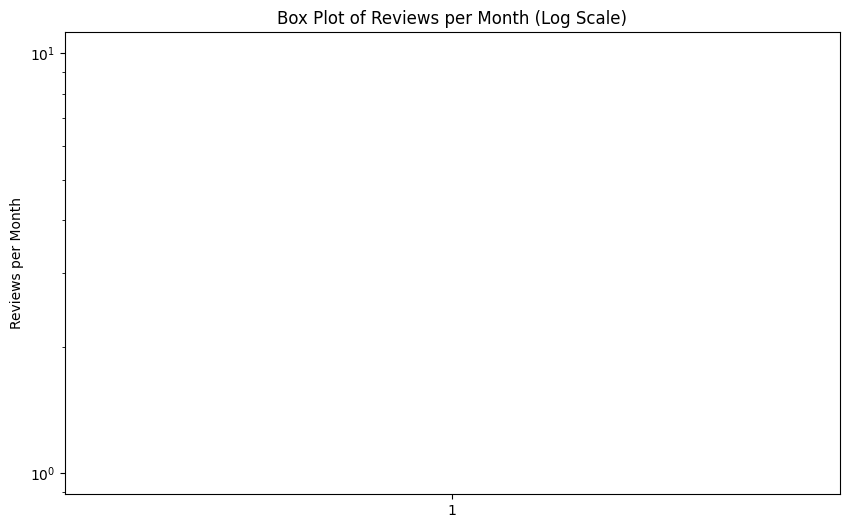

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
reviews = df1['reviews_per_month']

plt.figure(figsize=(10, 6))
plt.boxplot(reviews, vert=True, patch_artist=True)
plt.yscale('log')
plt.ylabel('Reviews per Month')
plt.title('Box Plot of Reviews per Month (Log Scale)')
plt.show()


In [ ]:
grouped = df1.groupby('neighbourhood_group')['price'].mean()

In [ ]:
grouped

In [8]:
#!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Top 10 most expensive neighbourhoods
data = df1.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

In [ ]:
data

In [ ]:
# 10 suburbs with the most airbnb locations 
top_neighbourhoods = df1.groupby('neighbourhood')['host_id'].count().sort_values(ascending=False)[:10]

In [ ]:
top_neighbourhoods

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(top_neighbourhoods.index, top_neighbourhoods.values, color='skyblue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.show()

In [ ]:
top_reviewd_listing = df[['host id', 'NAME','number of reviews', 'neighbourhood']].sort_values(by='number of reviews',
                                                                                                ascending=False).head(10)

In [ ]:
top_reviewd_listing

In [ ]:
#scatter find relationship between price and number of reviews
plt.figure(figsize=(10,6))
plt.scatter(df1['price'], df1['number of reviews'], color='skyblue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs. Number of Reviews')
plt.show()


In [ ]:
# find null values 
null_values = df.isnull()

In [ ]:
null_values

In [ ]:
df1.isna().sum()

In [ ]:
import seaborn as sns
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='price')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import scipy.stats as stats
stats.probplot(df1['price'], dist="norm", plot=plt)
plt.show()

In [ ]:
print(df1['price'].describe())
print(f"Skewness: {df1['price'].skew()}")
print(f"Kurtosis: {df1['price'].kurt()}")


In [ ]:
from scipy import stats

# Compute Z-scores
df1['z_score_price'] = stats.zscore(df1['price'])
outliers_z = df1[(df1['z_score_price'] > 3) | (df1['z_score_price'] < -3)]
print(f'Number of outliers detected using Z-scores: {len(outliers_z)}')


In [123]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = df1[(df1['price'] < (Q1 - 1.5 * IQR)) | (df1['price'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers detected using IQR: {len(outliers_iqr)}')


Number of outliers detected using IQR: 0


In [121]:
data = df1.groupby(['neighbourhood']).agg({'price':'mean', 'review_rate_number':'mean'}).sort_values(by='price', ascending=False).round(2)

In [122]:
data.head(10)

,price,review_rate_number
neighbourhood,,
New Dorp,1045.00,3.25
"Chelsea, Staten Island",1042.00,2.00
Fort Wadsworth,1024.00,2.00
Little Neck,817.75,3.88
Jamaica Hills,812.90,2.67
Arden Heights,804.89,3.78
Midland Beach,796.18,3.29
Shore Acres,792.26,3.78
Mill Basin,775.14,3.79


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data["review_rate_number"], data["price"], alpha=0.5)
plt.show()

In [ ]:
data = df1['neighbourhood_group'][df1['neighbourhood']=='Arden Heights'].unique()
data

In [27]:
group = df1.loc[df1['neighbourhood']=='Arden Heights', ['neighbourhood_group', 'price']].round(1)[:2]

In [28]:
group

,neighbourhood_group,price
29605,Staten Island,961.0
35820,Staten Island,604.0


In [26]:
host_ids = df1.groupby('host_id')['id'].count()
multiple_properties = host_ids[host_ids>1].index
multiple_properties

Index([  150519910,   176369804,   538762830,   635525656,   651454903,
         653456847,   846909103,   862834181,   885280047,  1074774907,
       ...
       95871502414, 96025410264, 96980723329, 97219387634, 97528248465,
       97606085736, 98245243479, 98280718071, 98342871281, 98402835539],
      dtype='int64', name='host_id', length=542)

In [ ]:
df['distance_to_airport'] = df.apply(calculate_distance, axis=1)
df['distance_to_airport'] = df['distance_to_airport'].round(2)
max_distance = df[df['distance_to_airport']== min(df['distance_to_airport'])]
max_distance


hosts = df[['host_id', 'host_name', 'host_identity_verified', 'calculated_host_listings_count']].drop_duplicates()


In [ ]:
data = hosts.loc[(hosts['host_id']==29531702698) &  (hosts['calculated_host_listings_count']==6.0) ]
# df.drop(index=42960, inplace=True)
hosts.drop(index=42960, inplace=True)
hosts.to_sql('hosts', engine, index=False, if_exists='append')
hosts.to_sql('hosts', engine, index=False, if_exists='append')
listings = df[[
    'id', 'NAME', 'host_id', 'neighbourhood_group', 'neighbourhood', 
    'lat', 'long', 'room_type', 'Construction_year', 'price', 
    'service_fee', 'minimum_nights', 'availability_365', 'instant_bookable', 'cancellation_policy'
]].drop_duplicates()
reviews = df[['id', 'number_of_reviews', 'last_review', 
    'reviews_per_month', 'review_rate_number']].drop_duplicates()

# the first rest_index(drop=True) removes the current index and replace it with a standard integer index, the second index
# creates a new column called 'index' containing these sequential integers

reviews = reviews.reset_index(drop=True).reset_index()
reviews.rename(columns={'index': 'review_id', 'id': 'listing_id'}, inplace=True)
reviews.to_sql('reviews', engine, index=False, if_exists='replace')